## Starting off

Define write down a definition for the following two terms:

Bias - 

Variance - 

# Understanding the Machine Learning Process

Agenda:

- Bias versus Variance
- Train Test Split
- Model Evaluation

## The Machine Learning Process

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.


**A proper machine learning workflow includes:**

* Separate training and test sets
* Trying appropriate algorithms (No Free Lunch)
* Fitting model parameters
* Tuning impactful hyperparameters
* Proper performance metrics
* Systematic cross-validation

# Bias - Variance 

There are 3 types of prediction error: bias, variance, and irreducible error.


**Total Error = Bias + Variance + Irreducible Error**

### The Bias-Variance Tradeoff


**Let's do a thought experiment:**

1. Imagine you've collected 5 different training sets for the same problem.
2. Now imagine using one algorithm to train 5 models, one for each of your training sets.
3. Bias vs. variance refers to the accuracy vs. consistency of the models trained by your algorithm.

<img src='Bias-vs.-Variance-v5-2-darts.png' width=500 />

**High bias** algorithms tend to be less complex, with simple or rigid underlying structure.

+ They train models that are consistent, but inaccurate on average.
+ These include linear or parametric algorithms such as regression and naive Bayes.

On the other hand, **high variance** algorithms tend to be more complex, with flexible underlying structure.

+ They train models that are accurate on average, but inconsistent.
+ These include non-linear or non-parametric algorithms such as decision trees and nearest neighbors.

### Bias-Variance Tradeoff

This tradeoff in complexity is why there's a tradeoff in bias and variance - an algorithm cannot simultaneously be more complex and less complex.

**Total Error = Bias^2 + Variance + Irreducible Error**


<img src='Bias-vs.-Variance-v4-chart.png' width=500 />

### Error from Bias

**Bias** is the difference between your model's expected predictions and the true values.

<img src='noisy-sine-linear.png' width=500 />

### Error from Variance

**Variance** refers to your algorithm's sensitivity to specific sets of training data.



<img src='noisy-sine-decision-tree.png' width=500/>

Which one is overfit and which one is underfit?

We want to try to find the proper balance of variance and bias

<img src='noisy-sine-third-order-polynomial.png' width=500 />


# Train Test Split

**How do we know if our model is overfitting or underfitting?**



If our model is not performing well on the training  data, we are probably underfitting it.  


To know if our  model is overfitting the data, we need  to test our model on unseen data. 
We then measure our performance on the unseen data. 

If the model performs way worse on the  unseen data, it is probably  overfitting the data.

The previous module introduced the idea of dividing your data set into two subsets:

* **training set** —a subset to train a model.
* **test set**—a subset to test the trained model.

You could imagine slicing the single data set as follows:

<img src='testtrainsplit.png' width =550 />

**Never train on test data.** If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. 



<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg' width=500/>

## Model Evaluation Metrics for Regression

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:



![alt text](mae.png)

**Mean Squared Error** (MSE) is the mean of the squared errors:

![alt text](mse.png)

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:



![alt text](rmse.png)

MSE is more popular than MAE because MSE "punishes" larger errors. 

But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

Additionally, I like to divide the RMSE by the standard deviation to  convert it to something similiar to a Z-Score.

# Practicum

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib
import seaborn as sns

Using matplotlib backend: Qt5Agg


### Read in Kings County Housing Data Set


In [2]:
df = pd.read_csv('kc_house_data.csv',index_col='id')

### Take a look at the data

In [3]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [4]:
df['yr_old']=2017 - df['yr_built']

df.drop(['yr_built', 'lat', 'long'], axis=1, inplace=True)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,yr_old
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,84.402258,98077.939805,1986.552492,12768.455652,45.994864
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,401.679240,53.505026,685.391304,27304.179631,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,399.000000,651.000000,2.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,1490.000000,5100.000000,20.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,1840.000000,7620.000000,42.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,2360.000000,10083.000000,66.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,6210.000000,871200.000000,117.000000


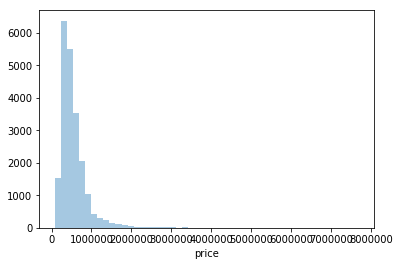

In [6]:
sns.distplot(df.price, bins=50, kde=False);


## Feature exploration¶

In this section I will be investigating different features by plotting them to determine the relationship to SalePrice.

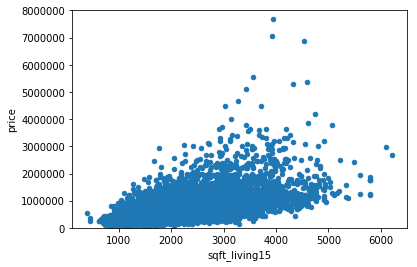

In [7]:
var = 'sqft_living15'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,8000000));

In [8]:
def  draw_boxplots(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sns.boxplot(x=var, y="price", data=df)
    fig.axis(ymin=0, ymax=3500000);

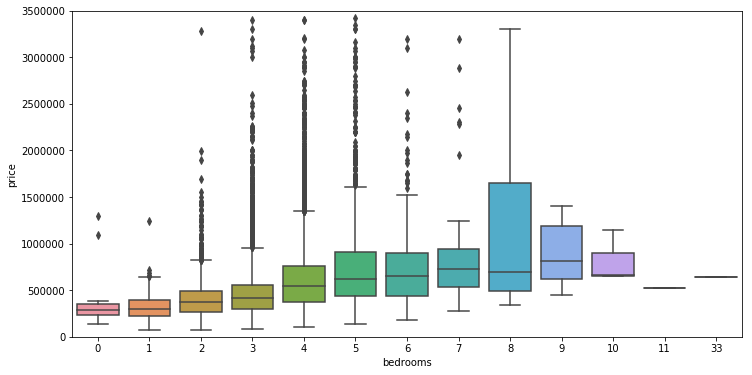

In [9]:
draw_boxplots('bedrooms')

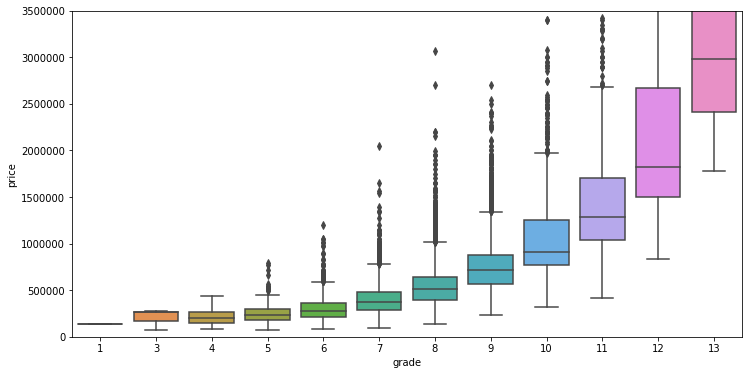

In [10]:
draw_boxplots('grade')

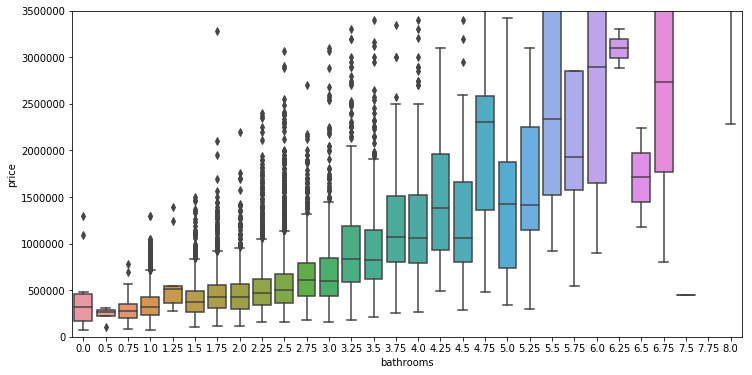

In [11]:
draw_boxplots('bathrooms')

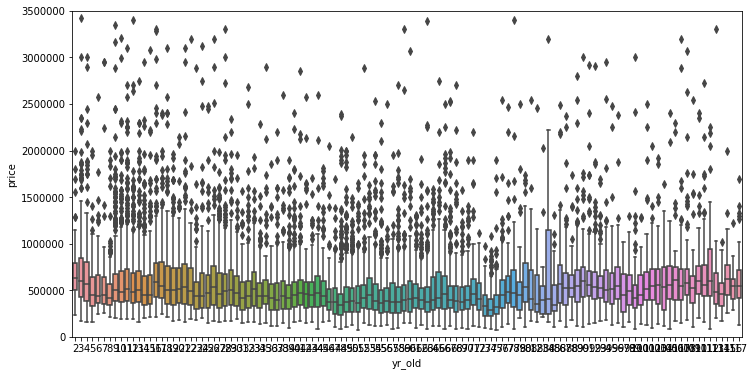

In [12]:
draw_boxplots('yr_old')

/Users/swilson5/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


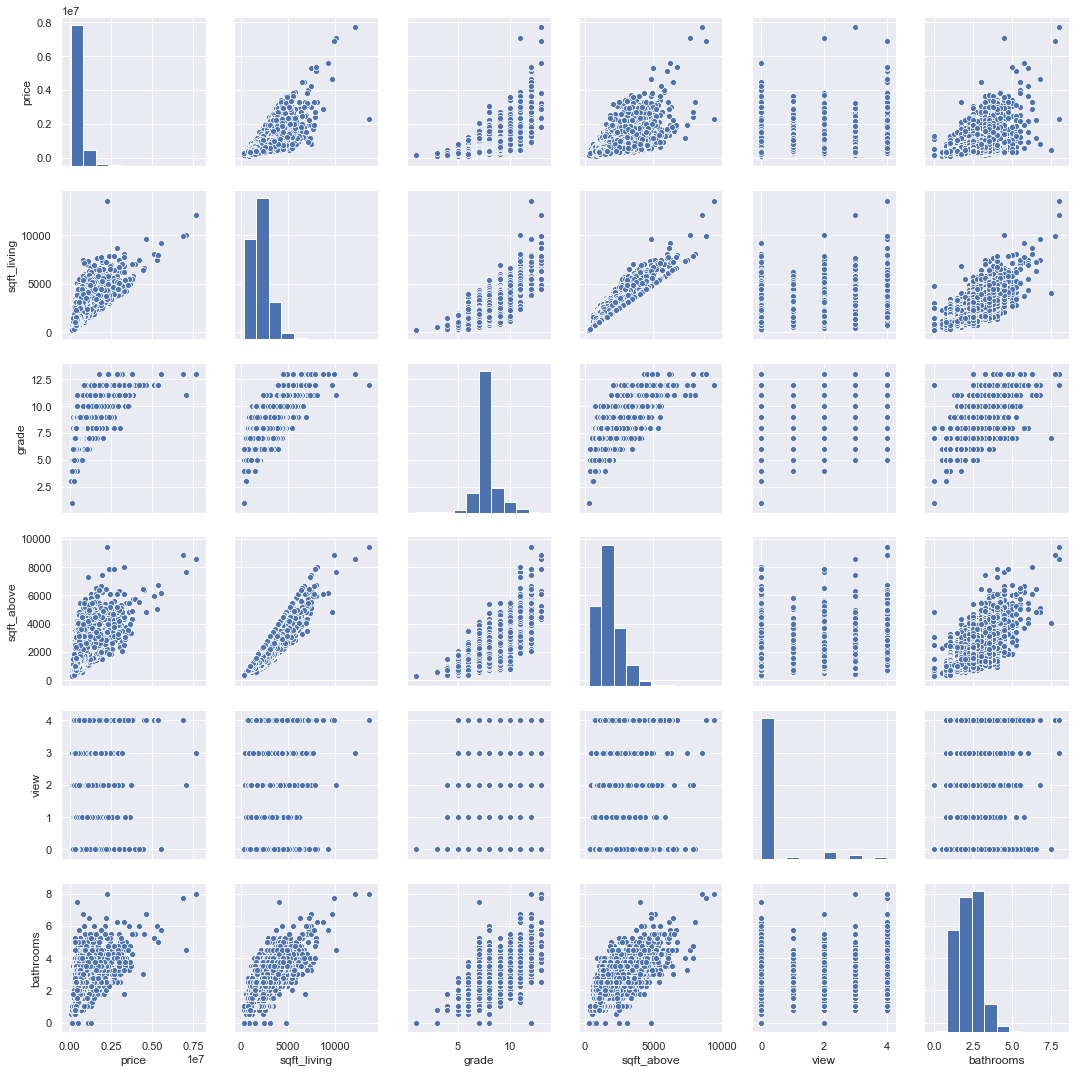

In [13]:
#scatterplot
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(df[cols], size = 2.5)
plt.show();

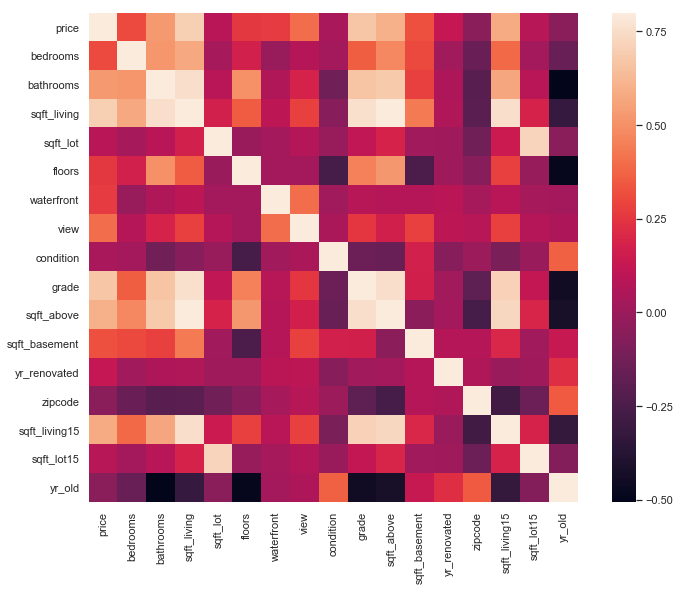

In [14]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [15]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
yr_old,0,0.0
sqft_lot15,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


### Identify my features and target variable

In [16]:
target = df.price

#Date  is not in the correct format so we are dropping it for now.
features = df.drop(['price','date'], axis=1)

In [17]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,yr_old
id,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,1340,5650,62
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,1690,7639,66
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,2720,8062,84
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,1360,5000,52
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,1800,7503,30
7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,0,98053,4760,101930,16
1321400060,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,0,98003,2238,6819,22
2008000270,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,0,98198,1650,9711,54
2414600126,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,0,98146,1780,8113,57


In [18]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'yr_old'],
      dtype='object')

### Create Train and Test Split

The random state variable makes it so you can always have the same 'random' split

In [19]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (17290, 16) Target:  (17290,)
Training set - Features:  (4323, 16) Target:  (4323,)


In [20]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

-2496611.964163619
[-3.33387929e+04  3.83290074e+04  9.92132709e+01  5.67611984e-02
  3.57326834e+04  5.64758681e+05  4.23450507e+04  2.17495566e+04
  1.21652871e+05  4.21519986e+01  5.70612725e+01  1.16213352e+01
  1.49996132e+01  3.50475207e+01 -5.52445705e-01  3.46374028e+03]


### How well did our model perform

Previously we have looked at the R^2 of the model  to  determine  how good of a model this is.  

In [21]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.6549567961933483


In [22]:
y_train_pred = lm.predict(X_train)

In [23]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 137193.24269594092
Mean Squared Error: 43252167023.41316
Root Mean Squared Error: 207971.55339952905


In [24]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.37369403304994836
Root Mean Squared Error: 0.5664836476077558


### Predicting the Test Set

In [25]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

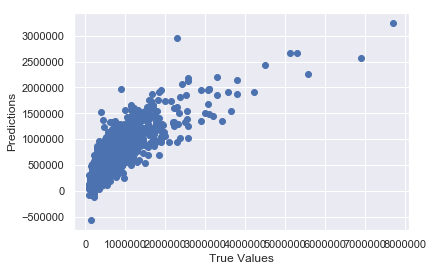

In [26]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

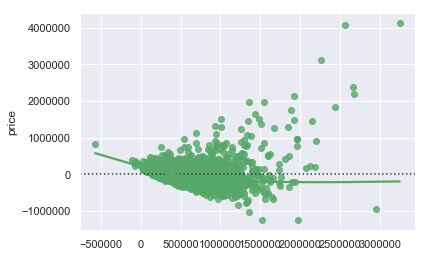

In [27]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [28]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.6464287941175522


In [29]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:141526.9686029574
Mean Squared Error:60956257983.10983
Root Mean Squared Error:246893.21169912678


In [30]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.38549845927752346
Root Mean Squared Error Z: 0.6725004686781932


### Comparing our Model's performance on training data versus test data.

In [31]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  207971 vs. Testing:  246893


### Let's try with more features

In [32]:
#import feature from sklearn to help us create  polynomial features
from sklearn.preprocessing import PolynomialFeatures

#instantiate this class
poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
#fit and transform the data and create a  new dataframe
df_poly_2= pd.DataFrame(poly_2.fit_transform(features), columns=poly_2.get_feature_names(features.columns))


In [33]:
pd.set_option('display.max_columns', 300)


In [34]:
df_poly_2.head()

,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,yr_old,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_renovated,bedrooms zipcode,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms yr_old,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_renovated,bathrooms zipcode,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms yr_old,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_renovated,sqft_living zipcode,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living yr_old,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot yr_old,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_renovated,floors zipcode,floors sqft_living15,floors sqft_lot15,floors yr_old,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_renovated,waterfront zipcode,waterfront sqft_living15,waterfront sqft_lot15,waterfront yr_old,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_renovated,view zipcode,view sqft_living15,view sqft_lot15,view yr_old,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_renovated,condition zipcode,condition sqft_living15,condition sqft_lot15,condition yr_old,grade^2,grade sqft_above,grade sqft_basement,grade yr_renovated,grade zipcode,grade sqft_living15,grade sqft_lot15,grade yr_old,sqft_above^2,sqft_above sqft_basement,sqft_above yr_renovated,sqft_above zipcode,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above yr_old,sqft_basement^2,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement yr_old,yr_renovated^2,yr_renovated zipcode,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated yr_old,zipcode^2,zipcode sqft_living15,zipcode sqft_lot15,zipcode yr_old,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 yr_old,sqft_lot15^2,sqft_lot15 yr_old,yr_old^2
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,0.0,98178.0,1340.0,5650.0,62.0,9.0,3.00,3540.0,16950.0,3.0,0.0,0.0,9.0,21.0,3540.0,0.0,0.0,294534.0,4020.0,16950.0,186.0,1.0000,1180.0,5650.0,1.0,0.0,0.0,3.00,7.00,1180.0,0.0,0.00,98178.00,1340.0,5650.00,62.0,1392400.0,6667000.0,1180.0,0.0,0.0,3540.0,8260.0,1392400.0,0.0,0.0,115850040.0,1581200.0,6667000.0,73160.0,31922500.0,5650.0,0.0,0.0,16950.0,39550.0,6667000.0,0.0,0.0,554705700.0,7571000.0,31922500.0,350300.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,0.0,98178.0,1340.0,5650.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,21.0,3540.0,0.0,0.0,294534.0,4020.0,16950.0,186.0,49.0,8260.0,0.0,0.0,687246.0,9380.0,39550.0,434.0,1392400.0,0.0,0.0,115850040.0,1581200.0,6667000.0,73160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.638920e+09,131558520.0,554705700.0,6087036.0,1795600.0,7571000.0,83080.0,31922500.0,350300.0,3844.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1991.0,98125.0,1690.0,7639.0,66.0,9.0,6.75,7710.0,21726.0,6.0,0.0,0.0,9.0,21.0,6510.0,1200.0,5973.0,294375.0,5070.0,22917.0,198.0,5.0625,5782.5,16294.5,4.5,0.0,0.0,6.75,15.75,4882.5,900.0,4479.75,220781.25,3802.5,17187.75,148.5,6604900.0,18611940.0,5140.0,0.0,0.0,7710.0,17990.0,5576900.0,1028000.0,511

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df_poly_2, target, random_state=34,test_size=0.2)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(17290, 153) (17290,)
(4323, 153) (4323,)


In [36]:

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train, y2_train)
y2_train_pred = lm2.predict(X2_train)


In [37]:

train2_mae = metrics.mean_absolute_error(y2_train, y2_train_pred)

In [38]:
y2_pred = lm2.predict(X2_test)
# sns.residplot(y2_pred, y2_test, lowess=True, color="g")

test2_mae = metrics.mean_absolute_error(y2_test, y2_pred)

print("Training Error: ", train2_mae, "vs. Testing Error: ", test2_mae)


Training Error:  119938.43079207439 vs. Testing Error:  123376.26420092401


Now lets try and add on  even more  variables!

In [39]:

poly = PolynomialFeatures(degree=3, interaction_only= False )


In [40]:
df_poly_3= pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(features.columns))
df_poly_3.head()

,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,yr_old,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_renovated,bedrooms zipcode,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms yr_old,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_renovated,bathrooms zipcode,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms yr_old,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_renovated,sqft_living zipcode,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living yr_old,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot yr_old,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_renovated,floors zipcode,floors sqft_living15,floors sqft_lot15,floors yr_old,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_renovated,waterfront zipcode,waterfront sqft_living15,waterfront sqft_lot15,waterfront yr_old,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_renovated,view zipcode,view sqft_living15,view sqft_lot15,view yr_old,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_renovated,condition zipcode,condition sqft_living15,condition sqft_lot15,condition yr_old,grade^2,grade sqft_above,grade sqft_basement,grade yr_renovated,grade zipcode,grade sqft_living15,grade sqft_lot15,grade yr_old,sqft_above^2,sqft_above sqft_basement,sqft_above yr_renovated,sqft_above zipcode,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above yr_old,sqft_basement^2,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement yr_old,yr_renovated^2,yr_renovated zipcode,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated yr_old,zipcode^2,zipcode sqft_living15,zipcode sqft_lot15,zipcode yr_old,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 yr_old,...,condition grade sqft_lot15,condition grade yr_old,condition sqft_above^2,condition sqft_above sqft_basement,condition sqft_above yr_renovated,condition sqft_above zipcode,condition sqft_above sqft_living15,condition sqft_above sqft_lot15,condition sqft_above yr_old,condition sqft_basement^2,condition sqft_basement yr_renovated,condition sqft_basement zipcode,condition sqft_basement sqft_living15,condition sqft_basement sqft_lot15,condition sqft_basement yr_old,condition yr_renovated^2,condition yr_renovated zipcode,condition yr_renovated sqft_living15,condition yr_renovated sqft_lot15,condition yr_renovated yr_old,condition zipcode^2,condition zipcode sqft_living15,condition zipcode sqft_lot15,condition zipcode yr_old,condition sqft_living15^2,condition sqft_living15 sqft_lot15,condition sqft_living15 yr_old,condition sqft_lot15^2,condition sqft_lot15 yr_old,condition yr_old^2,grade^3,grade^2 sqft_above,grade^2 sqft_basement,grade^2 yr_renovated,grade^2 zipcode,grade^2 sqft_living15,grade^2 sqft_lot15,grade^2 yr_old,grade sqft_above^2,grade sqft_above sqft_basement,grade sqft_above yr_renovated,grade sqft_above zipcode,grade sqft_above sqft_living15,grade sqft_above sqft_lot15,grade sqft_above yr_old,grade sqft_basement^2,grade sqft_basement yr_renovated,grade sqft_basement zipcode,grade sqft_basement sqft_livi

In [41]:
df_poly_3.head()

,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,yr_old,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_renovated,bedrooms zipcode,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms yr_old,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_renovated,bathrooms zipcode,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms yr_old,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_renovated,sqft_living zipcode,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living yr_old,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot yr_old,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_renovated,floors zipcode,floors sqft_living15,floors sqft_lot15,floors yr_old,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_renovated,waterfront zipcode,waterfront sqft_living15,waterfront sqft_lot15,waterfront yr_old,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_renovated,view zipcode,view sqft_living15,view sqft_lot15,view yr_old,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_renovated,condition zipcode,condition sqft_living15,condition sqft_lot15,condition yr_old,grade^2,grade sqft_above,grade sqft_basement,grade yr_renovated,grade zipcode,grade sqft_living15,grade sqft_lot15,grade yr_old,sqft_above^2,sqft_above sqft_basement,sqft_above yr_renovated,sqft_above zipcode,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above yr_old,sqft_basement^2,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement yr_old,yr_renovated^2,yr_renovated zipcode,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated yr_old,zipcode^2,zipcode sqft_living15,zipcode sqft_lot15,zipcode yr_old,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 yr_old,...,condition grade sqft_lot15,condition grade yr_old,condition sqft_above^2,condition sqft_above sqft_basement,condition sqft_above yr_renovated,condition sqft_above zipcode,condition sqft_above sqft_living15,condition sqft_above sqft_lot15,condition sqft_above yr_old,condition sqft_basement^2,condition sqft_basement yr_renovated,condition sqft_basement zipcode,condition sqft_basement sqft_living15,condition sqft_basement sqft_lot15,condition sqft_basement yr_old,condition yr_renovated^2,condition yr_renovated zipcode,condition yr_renovated sqft_living15,condition yr_renovated sqft_lot15,condition yr_renovated yr_old,condition zipcode^2,condition zipcode sqft_living15,condition zipcode sqft_lot15,condition zipcode yr_old,condition sqft_living15^2,condition sqft_living15 sqft_lot15,condition sqft_living15 yr_old,condition sqft_lot15^2,condition sqft_lot15 yr_old,condition yr_old^2,grade^3,grade^2 sqft_above,grade^2 sqft_basement,grade^2 yr_renovated,grade^2 zipcode,grade^2 sqft_living15,grade^2 sqft_lot15,grade^2 yr_old,grade sqft_above^2,grade sqft_above sqft_basement,grade sqft_above yr_renovated,grade sqft_above zipcode,grade sqft_above sqft_living15,grade sqft_above sqft_lot15,grade sqft_above yr_old,grade sqft_basement^2,grade sqft_basement yr_renovated,grade sqft_basement zipcode,grade sqft_basement sqft_livi

In [42]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(df_poly_3, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 16) (17290,)
(4323, 16) (4323,)


In [43]:
# fit a model
lm3 = linear_model.LinearRegression()
lm3 = lm.fit(X_train3, y_train3)


In [44]:
y_train_pred3 = lm3.predict(X_train3)



In [45]:

train_mae3 = metrics.mean_absolute_error(y_train3, y_train_pred3)

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train3, y_train_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train3, y_train_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train3, y_train_pred3))))

Mean Absolute Error:115819.11331252655
Mean Squared Error:27661761596.599915
SqRt of Mean Squared Error:166318.2539488673


In [46]:
y_pred3 = lm.predict(X_test3)

In [47]:
test_mae3 = metrics.mean_absolute_error(y_test3, y_pred3)
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test3, y_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test3, y_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))))

Mean Absolute Error:130149.22259374915
Mean Squared Error:46716361237.61557
SqRt of Mean Squared Error:216139.6799239223


###  Comparing our  Training Error and Test Error across models

In [58]:
errors = [[train_mae, test_mae], 
[ train2_mae, test2_mae],
[ train_mae3, test_mae3]]

In [59]:
df_error = pd.DataFrame(errors,index=[1,2,3],  columns=['train_error', 'test_error'])

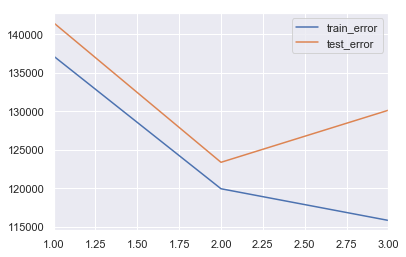

In [60]:
df_error.plot.line()